In [ ]:
Sigma (à quel point il impacte les clusters voisins)
=> influence la quantification error


Fort sigma => au niveau global
Faible sigma => au niveau local (pour les maladies)

Corrélation des diagrammes

Diabètes insulinodependant => dépend du pedigree

In [ ]:
pip install coclust

In [11]:
from coclust.io.data_loading import load_doc_term_data
from coclust.visualization import (plot_reorganized_matrix,
                                  plot_cluster_top_terms,
                                  plot_max_modularities)
from coclust.evaluation.internal import best_modularity_partition
from coclust.coclustering import CoclustMod

import numpy as np
from numpy import genfromtxt

In [12]:
# read data
my_data = genfromtxt('diabetes.csv', delimiter=',')
my_data = my_data[1:]
print(my_data)

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [13]:
# moyenne
moyennes = X.mean(axis=0)
print(moyennes)

# ecartType
ecartTypes = X.std(axis=0,ddof=1)
print(ecartTypes)

# Centrée et réduite
Xc = X - moyennes
Xcr = Xc / ecartTypes
Xcr

[  3.84505208 120.89453125  69.10546875  20.53645833  79.79947917
  31.99257812   0.4718763   33.24088542   0.34895833]
[  3.36957806  31.9726182   19.35580717  15.95221757 115.24400235
   7.88416032   0.3313286   11.76023154   0.47695138]


array([[ 0.63953049,  0.84777132,  0.1495433 , ...,  0.46818687,
         1.42506672,  1.36500637],
       [-0.84433482, -1.12266474, -0.16044119, ..., -0.36482303,
        -0.19054773, -0.73164341],
       [ 1.23307662,  1.94245802, -0.26376935, ...,  0.6040037 ,
        -0.10551539,  1.36500637],
       ...,
       [ 0.34275743,  0.00329872,  0.1495433 , ..., -0.68474712,
        -0.27558007, -0.73164341],
       [-0.84433482,  0.15968254, -0.47042568, ..., -0.37085933,
         1.1699697 ,  1.36500637],
       [-0.84433482, -0.87245064,  0.04621514, ..., -0.4734765 ,
        -0.87080644, -0.73164341]])

Computing coclust modularity for a range of cluster numbers =
 2 ...
 3 ...
 4 ...
 5 ...
 All done !
CoclustMod(n_clusters=3, random_state=0)
[540220884256055.9, 543233893036947.56, 523581401835619.1, 518123434852613.2]


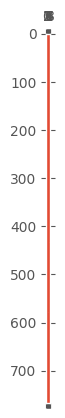

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (4).

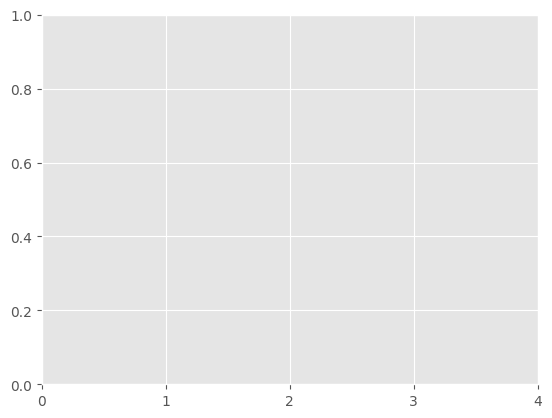

In [14]:
# get the best co-clustering over a range of cluster numbers
clusters_range = range(2, 6)
model, modularities = best_modularity_partition(Xcr, clusters_range, n_rand_init=1)
print(model)
print(modularities)

# plot the reorganized matrix
plot_reorganized_matrix(Xcr, model)

# plot the modularities over the range of cluster numbers
plot_max_modularities(modularities, range(2, 6))

In [ ]:
# TP3 - Carte topographique - Minisom

In [17]:
pip install minisom

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10601 sha256=0e253e8de8d9dc643cbd1c332b6c949785d17e1996b1e6c845cffba97bcd8c19
  Stored in directory: c:\users\ftg1\appdata\local\pip\cache\wheels\28\e3\3d\707f393fa9013d5ab7b3ffb914ded8ca3c40dec231fa392528
Successfully built minisom
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, '../')
%load_ext autoreload
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
%matplotlib inline
from minisom import MiniSom
from sklearn.preprocessing import minmax_scale, scale
%autoreload 2

In [19]:
df = pd.read_csv('diabetes.csv',sep=',')

# un numpy array des valeurs numeriques (pour la suite)
data = df._get_numeric_data().values
nomDesIndividus_ = list(df.index)
nomDesVariables_ = list(df)


# on met une partie des individus et des variables de cote
indice_individus = np.array(range(768))
indice_variables = np.array(range(9))

# broadcasting 
X = data[indice_individus[:,None],indice_variables] 

# List Comprehensions
nomDesVariables = [nomDesVariables_[i] for i in indice_variables]
nomDesIndividus = [nomDesIndividus_[i] for i in indice_individus]

In [20]:
feature_names = ['Pregnancies','Glucose', 'BloodPressure','SkinThickness','Insulin',
                 'BMI','DiabetesPedigreeFunction','Age','Outcome' ]

X = df[feature_names].values
X = scale(X)
feature_df = pd.DataFrame(X, columns=feature_names)
target = feature_df.iloc[:,0]
Features = feature_df.iloc[:,1:]

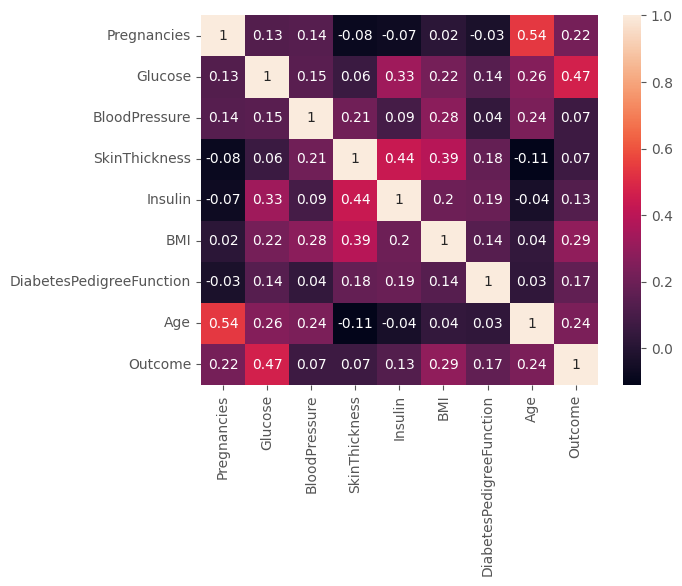

In [21]:
import seaborn as sn

feat_num = len(feature_names)

# plt.figure(figsize=(feat_num,feat_num/2))
corrMatrix = feature_df.corr().round(2)
sn.heatmap(corrMatrix, annot=True)

# plt.tight_layout()
    
plt.show()

[0.09173247 0.08275821 0.09214682 0.02904655 0.10583877 0.12160621
 0.46805765 0.00881331]


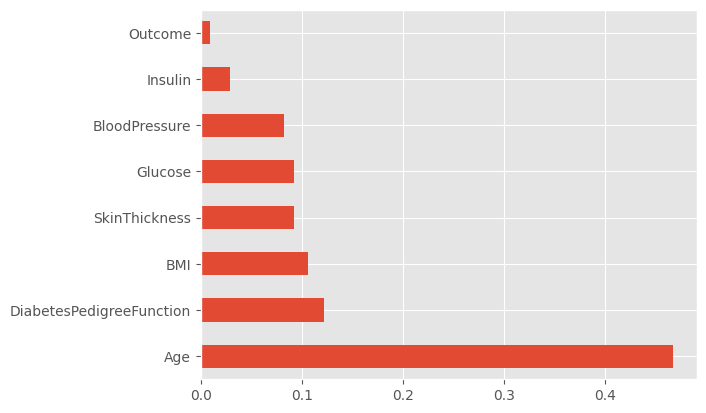

In [22]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=0)
model.fit(Features, target)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
# #plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Features.columns)
feat_importances.nlargest(Features.shape[1]).plot(kind='barh')
plt.show()

In [23]:
size = 15
som = MiniSom(size, size, len(X[0]),
              neighborhood_function='gaussian', sigma=2,
              random_seed=1)

som.pca_weights_init(X)
som.train_random(X, 1000, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.2962158521099785


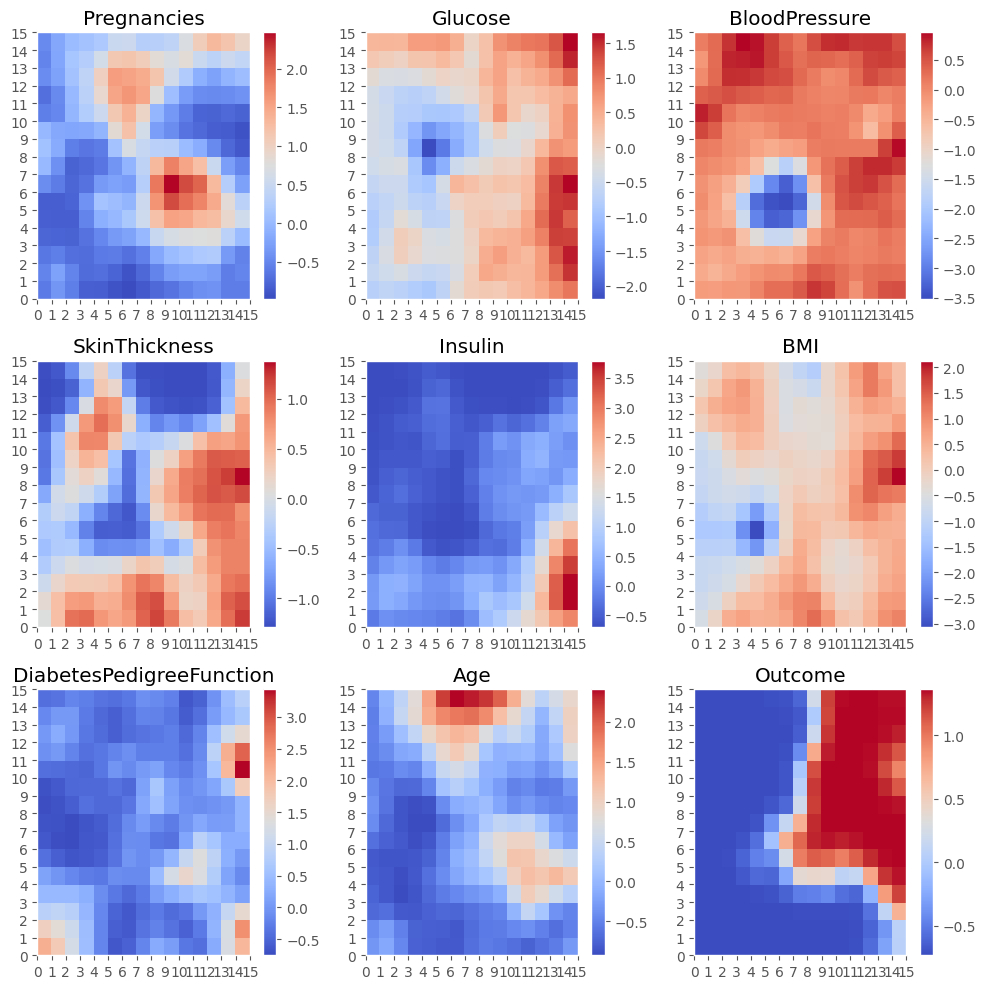

In [27]:
W = som.get_weights()
plt.figure(figsize=(10, 10))
for i, f in enumerate(feature_names):
    plt.subplot(3, 3, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='coolwarm')
    plt.xticks(np.arange(size+1))
    plt.yticks(np.arange(size+1))
    plt.colorbar(ticks=[-4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4])
plt.tight_layout()
plt.show()

# Basic Usage

In [42]:
columns=['Pregnancies','Glucose', 'BloodPressure','SkinThickness','Insulin',
                 'BMI','DiabetesPedigreeFunction','Age','Outcome' ]
df = pd.read_csv('diabetes.csv',sep=',')
target = df['Outcome'].values
label_names = {0:'Non', 1:'Oui'}
df =df[df.columns[:-1]]
# data normalization
df = (df - np.mean(df, axis=0)) / np.std(df, axis=0)
df = df.values

df

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [43]:
n_neurons = 15
m_neurons = 15
som = MiniSom(n_neurons, m_neurons,len(df[0]), sigma=2, 
              neighborhood_function='gaussian', random_seed=1)

som.pca_weights_init(df)
som.train(df, 1000, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.1829978948856663


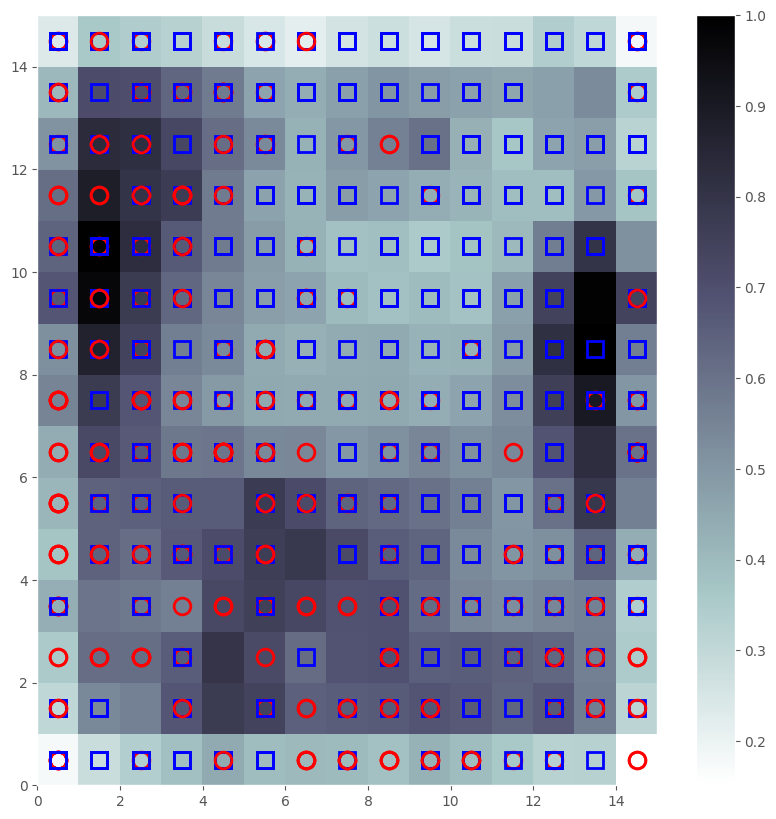

In [44]:
plt.figure(figsize=(10, 10))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label
markers = ['o', 's']
colors = ['r', 'b']
for cnt, xx in enumerate(df):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]-1], markerfacecolor='None',
             markeredgecolor=colors[target[cnt]-1], markersize=12, markeredgewidth=2)

plt.show()

In [ ]:
Ca nous donne la densité sur le nuage de point
=> ça ressemble bcp à Outcome

Plus c'est noir, plus c'est elastique, cela veut dire que les individus sont attirées par les autres clusters (cela montre des frontières) = c'est du vide
A corréler avec les autres diagrammes qui montrent les vides et la densité d'informations (captation de données)

On voit les frontières avec ceux

Einstein = théorie relativité générale (mini-SOM)
Newton = gravité (k-means)

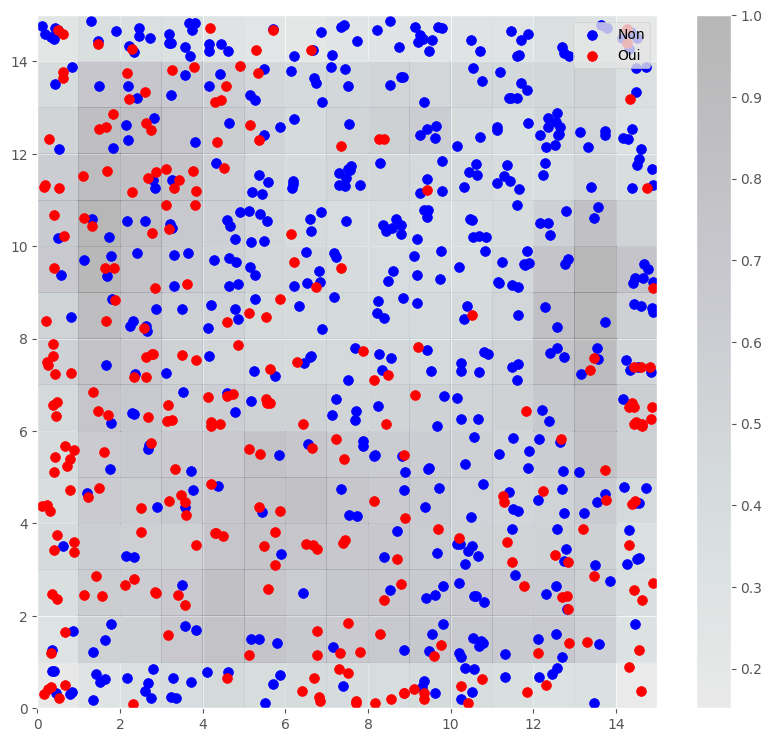

In [45]:
w_x, w_y = zip(*[som.winner(d) for d in df])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

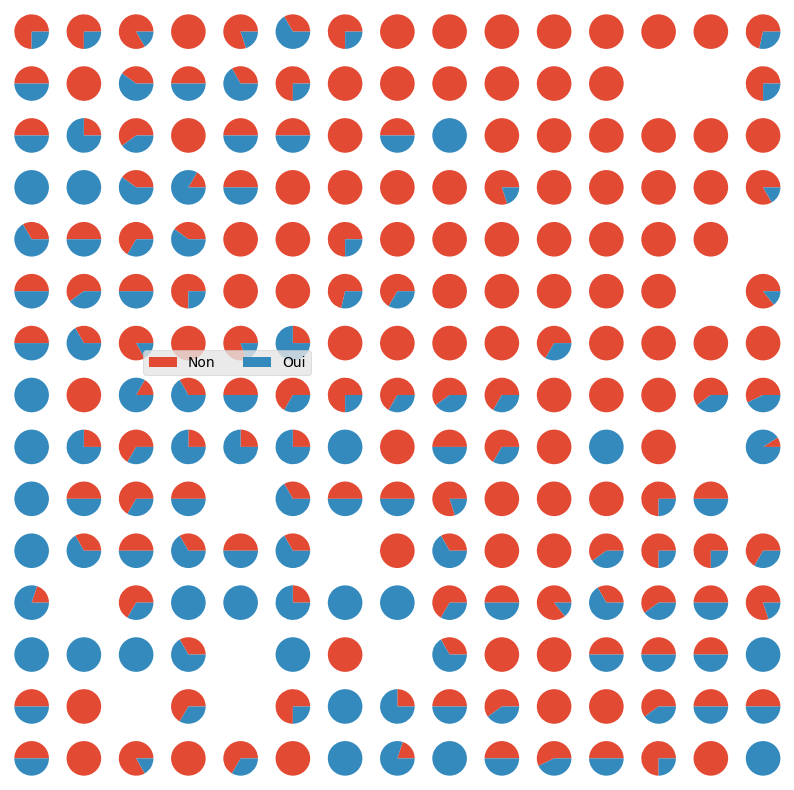

In [46]:
import matplotlib.gridspec as gridspec

labels_map = som.labels_map(df, [label_names[t] for t in target])

fig = plt.figure(figsize=(10, 10))
the_grid = gridspec.GridSpec(n_neurons, m_neurons, fig)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names.values()]
    plt.subplot(the_grid[n_neurons-1-position[1],
                         position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)

plt.legend(patches, label_names.values(), bbox_to_anchor=(3.5, 6.5), ncol=3)

plt.show()